## CALCULATING MOMENTS (0, 1 Y 2 )
https://github.com/radio-astro-tools/tutorials/blob/master/masking_and_moments/masking_and_moments_guide.ipynb

In [ ]:
import numpy as np
from astropy.io import fits
from astropy import units as u
from spectral_cube import SpectralCube
from matplotlib import pyplot as plt
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.wcs.utils import skycoord_to_pixel
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

### ---------------------------- Parameters to change ---------------------------

In [27]:
## Abrir los cubos de datos

file1 = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/CORRECT/CII/CII_N159_SPAT_RES.fits'
file2 = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/CORRECT/CF+/CF+_N159_sci_VELAXIS_SPECT_SPAT_RES.fits'

cube1 = SpectralCube.read(file1)
cube2 = SpectralCube.read(file2)
print(cube1)
print(cube2)

header1 = cube1.header
header2 = cube2.header
print(repr(header1))
print(repr(header2))

# Open de RMS files
rms_file1 = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/RMS/RMS_YOKO_CII_SpatRes.fits' # archivo rms para el cubo 1
rms_file2 = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/RMS/RMS_CF+_N159_sci_VELAXIS_SPECT_SPAT_RES.fits' # archivo rms para el cubo 2

# Read the FITS files
with fits.open(rms_file1) as hdu_list1:
    data_rms1 = hdu_list1[0].data
    # Asignamos la unidad correcta desde el cubo1 al array de datos RMS
    data_rms1 = data_rms1 * cube1.unit

with fits.open(rms_file2) as hdu_list2:
    data_rms2 = hdu_list2[0].data
    # Asignamos la unidad correcta desde el cubo2 al array de datos RMS
    data_rms2 = data_rms2 * cube2.unit

# Quantities of channel to integrate
nchan = 3
order = 0    #number of momento to calculate

# ------------- Define the output file names ---------------------
# Output for cube 1
output_file1 = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/MOMENT/CII_IntegMap_withMask.fits'
output_file1_m1 = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/MOMENT/CII_Mom1_withMask.fits'
output_file1_linewidth = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/MOMENT/CII_linewidth_withMask.fits'

# Output for cube 2
output_file2 = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/MOMENT/CF_IntegMap_withMask.fits'
output_file2_m1 = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/MOMENT/CF_Mom1_withMask.fits'
output_file2_linewidth = 'C:/Users/macka/OneDrive/Documentos/Master/PYTHON_CODES/RESULTS/FITS/MOMENT/CF_linewidth_withMask.fits'

# ------------------ DEfine the velocity range -----------------------
mask_ranges_km_s = [(221, 250), (225, 246)] # Define the ranges of velocities windows km/s (ALMA, YOKO)
print('Mask ranges in km/s:', mask_ranges_km_s)

fit_range_km_s = [(200., 270.)] # Define range of velocities for the moment calculation
print('Fit range in km/s:', fit_range_km_s)
vel_min, vel_max = fit_range_km_s[0][0] * u.km/u.s, fit_range_km_s[0][1] * u.km/u.s

# Select the region to generate channel maps
# Define the center coordinates of the region to mask
coord = SkyCoord("05h39m36.675s", "-69d46m00.260s", frame='icrs')

# Define the size of the region to mask (in arcseconds)
width = 90 * u.arcsec
height = 110 * u.arcsec  # Width and height in arcseconds



SpectralCube with shape=(300, 60, 70) and unit=K:
 n_x:     70  type_x: RA---TAN  unit_x: deg    range:    84.795517 deg:   85.091658 deg
 n_y:     60  type_y: DEC--TAN  unit_y: deg    range:   -69.807177 deg:  -69.719712 deg
 n_s:    300  type_s: VELO      unit_s: km / s  range:       38.000 km / s:     337.000 km / s
SpectralCube with shape=(729, 60, 70) and unit=Jy / beam:
 n_x:     70  type_x: RA---TAN  unit_x: deg    range:    84.795517 deg:   85.091658 deg
 n_y:     60  type_y: DEC--TAN  unit_y: deg    range:   -69.807177 deg:  -69.719712 deg
 n_s:    729  type_s: VRAD      unit_s: km / s  range:     -129.000 km / s:     599.000 km / s
SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3                                                  
NAXIS1  =                   70                                                  
NAXIS2  =                 

### ------------------------ See the Information into each cube ----------------------------------

In [28]:
# Obtain the essential information from the cubes
UNIT1 = cube1.header['CUNIT3']
CRVAL1 = cube1.header['CRVAL3'] * u.km/u.s # Value of the third axis
CRPIX1 = cube1.header['CRPIX3']  # Reference pixel of the third axis
CDELT1 = cube1.header['CDELT3'] * u.km/u.s # Coordinate increment at reference point

print('UNIT:', UNIT1)
print('CRVAL:', CRVAL1)
print('CRPIX:', CRPIX1)
print('CRDELT:', CDELT1)

print('--------------------')
UNIT2 = cube2.header['CUNIT3']
RESTFRQ2 = cube2.header['RESTFRQ'] * u.Hz  # Rest frequency in Hz
CRVAL2 = cube2.header['CRVAL3'] * u.km/u.s # Value of the third axis
CRPIX2 = cube2.header['CRPIX3']  # Reference pixel of the third axis
CDELT2 = cube2.header['CDELT3'] * u.km/u.s # Coordinate increment at reference point

print('UNIT in cube 2:', UNIT2)
print('RESTFRQ in cube 2:', RESTFRQ2)
print('CRVAL in cube 2:', CRVAL2)
print('CRPIX in cube 2:', CRPIX2)
print('CRDELT in cube 2:', CDELT2)

print('--------------------')
# Check the number of channels in the cubes
nchan1 = cube1.shape[0]
nchan2 = cube2.shape[0]
print('Number of channels in cube:', nchan1)
print('Number of channels in cube2:', nchan2)

print('--------------------')
wcs1 = cube1.wcs.celestial
wcs2 = cube2.wcs.celestial
print('WCS1:', wcs1)
print('WCS2:', wcs2)


UNIT: km s-1
CRVAL: 187.0 km / s
CRPIX: 150.0
CRDELT: 1.0 km / s
--------------------
UNIT in cube 2: km s-1
RESTFRQ in cube 2: 102587476000.0 Hz
CRVAL in cube 2: -129.00000000003 km / s
CRPIX in cube 2: 1.0
CRDELT in cube 2: 1.0 km / s
--------------------
Number of channels in cube: 300
Number of channels in cube2: 729
--------------------
WCS1: WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 84.909230273958 -69.760160218056 
CRPIX : 43.505224439404 32.760800801165 
PC1_1 PC1_2  : 1.0 0.0 
PC2_1 PC2_2  : 0.0 1.0 
CDELT : -0.00148148147855 0.00148148147855 
NAXIS : 70  60
WCS2: WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 84.909230273958 -69.760160218056 
CRPIX : 43.505224439404 32.760800801165 
PC1_1 PC1_2  : 1.0 0.0 
PC2_1 PC2_2  : 0.0 1.0 
CDELT : -0.00148148147855 0.00148148147855 
NAXIS : 70  60


### --------------------------- Creation of velocity axis ---------------------------

In [29]:
# Obtain the velocity axis and frequency axis
index1 = np.arange(1, nchan1 + 1 ) # Aggregate (+1) because nchan2 print 1 to 728
VEL1 = CRVAL1 + (index1 - CRPIX1) * CDELT1 #Create the velocity axis
print('Index:', index1)
print('Velocity:', VEL1)
print('---------------------')

index2 = np.arange(1, nchan2 + 1 ) # Aggregate (+1) because nchan2 print 1 to 728
VEL2 = CRVAL2 + (index2 - CRPIX2) * CDELT2 #Create the velocity axis
print('Index:', index2)
print('Velocity:', VEL2)


Index: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245

In [5]:
# In case that the Spectal axis is define in diferent form that cube one
# Encuentra los índices donde la velocidad está dentro del rango
#indices_dentro_rango = np.where((VEL1 >= vel_min) & (VEL1 <= vel_max))[0]

# Asegúrate de que hay canales en ese rango
#if len(indices_dentro_rango) == 0:
#    raise ValueError("No hay canales dentro del rango de velocidad especificado.")

# Encuentra el primer y último índice del subrango
#i_ini = indices_dentro_rango[0]
#i_fin = indices_dentro_rango[-1] + 1  # +1 porque en slicing el límite superior no se incluye

# Recorta el cubo: suponiendo que el cubo está en forma (espectro, y, x)
#subcube1 = cube1[i_ini:i_fin, :, :]

#### ----------------------- Cut the spectral axis for applied the moments ---------------------------------

In [30]:
# Cut the spectral axis for applied the moments
subcube1 = cube1.spectral_slab(vel_min, vel_max)
subcube2 = cube2.spectral_slab(vel_min, vel_max)

## GENERATE A MASK TAKING A VALUE OF 3-SIGMA
- remove the continuum
- obtain the RMS 
- applied 3 sigma to mask

In [65]:
# ---------------- Obtain the 3sigma and generate the masking ----------------
# Cube 1: 
threshold_rms1 = 3 * data_rms1   # Obtenemos el umbral de 3-sigma.
subcube_data1 = subcube1.hdu.data  # Obtenemos los datos del subcubo para la comparación, sin unidades.
threshold_3d1 = np.broadcast_to(threshold_rms1.value, subcube_data1.shape)   # Hacemos el broadcast de los datos de RMS para que coincida con la forma del subcubo.
boolean_mask1 = subcube_data1 > threshold_3d1  # Creamos la máscara booleana comparando los arrays de numpy.
masked_subcube1 = subcube1.with_mask(boolean_mask1)   # Aplicamos la máscara booleana al subcubo original.

# Proceso para el Cubo 2:
threshold_rms2 = 3 * data_rms2
subcube_data2 = subcube2.hdu.data
threshold_3d2 = np.broadcast_to(threshold_rms2, subcube_data2.shape)
boolean_mask2 = subcube_data2 > threshold_3d2
masked_subcube2 = subcube2.with_mask(boolean_mask2)


print('Se ha creado y aplicado la máscara de 3-sigma a ambos subcubos.')
print(f'Shape del subcubo 1 enmascarado: {masked_subcube1.shape}')
print('--------------------')
print(f'Shape del subcubo 2 enmascarado: {masked_subcube2.shape}')
print('--------------------')


Se ha creado y aplicado la máscara de 3-sigma a ambos subcubos.
Shape del subcubo 1 enmascarado: (71, 60, 70)
--------------------
Shape del subcubo 2 enmascarado: (71, 60, 70)
--------------------


------------------------

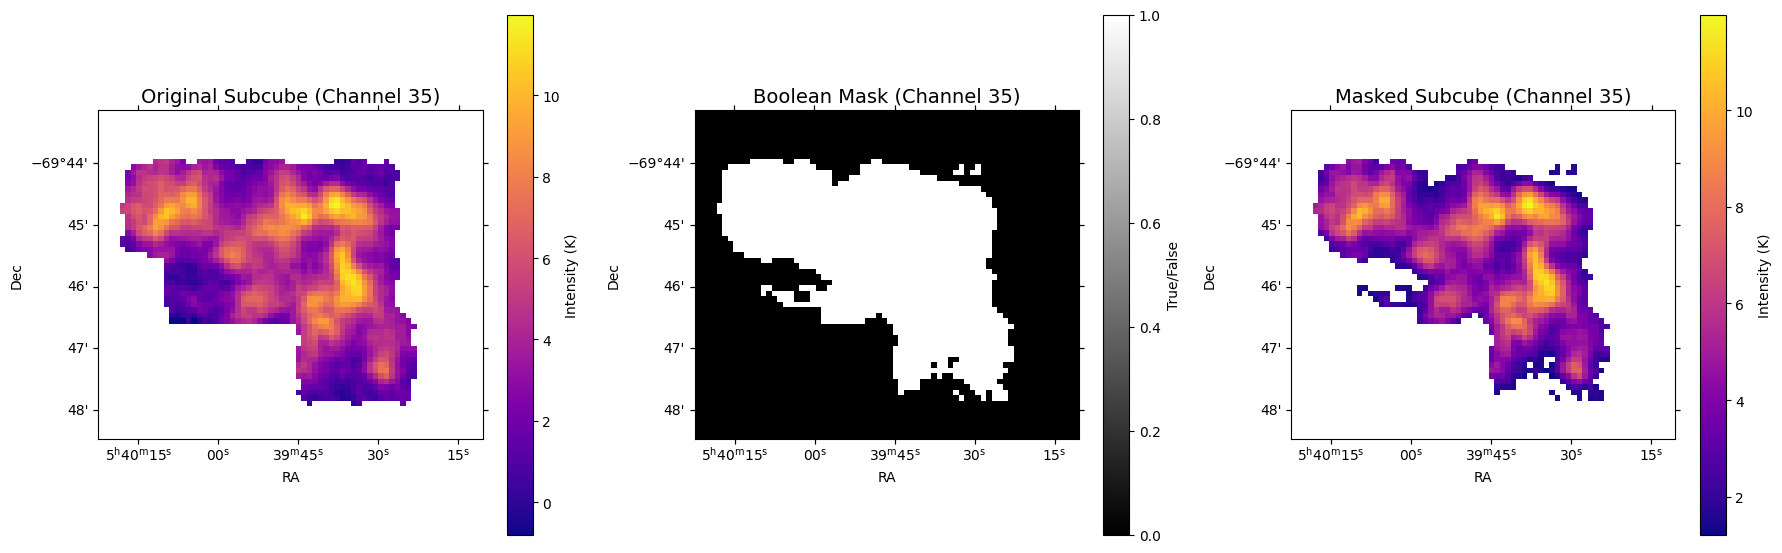

In [33]:
# ----------------- Visualizar la máscara y el efecto del enmascaramiento -----------------
# Plot para el Cubo 1 (YOKO)
# Seleccionamos un canal para la visualización
channel_index = subcube1.shape[0] // 2 # Usar el canal del medio como ejemplo
fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': subcube1.wcs.celestial})

# Trazar el subcubo original
im0 = axes[0].imshow(subcube1[channel_index].value, origin='lower', cmap='plasma')
axes[0].set_title(f"Original Subcube (Channel {channel_index})", fontsize=14)
cbar0 = plt.colorbar(im0, ax=axes[0])
cbar0.set_label(f'Intensity ({subcube1.unit})')

# Trazar la máscara booleana para ese canal
im1 = axes[1].imshow(boolean_mask1[channel_index], origin='lower', cmap='gray')
axes[1].set_title(f"Boolean Mask (Channel {channel_index})", fontsize=14)
cbar1 = plt.colorbar(im1, ax=axes[1])
cbar1.set_label('True/False')

# Trazar el subcubo enmascarado
# Asegúrate de que los valores nulos (donde la máscara es False) se muestren correctamente
masked_data = subcube_data1[channel_index] * boolean_mask1[channel_index]
masked_data[~boolean_mask1[channel_index]] = np.nan
im2 = axes[2].imshow(masked_data, origin='lower', cmap='plasma')
axes[2].set_title(f"Masked Subcube (Channel {channel_index})", fontsize=14)
cbar2 = plt.colorbar(im2, ax=axes[2])
cbar2.set_label(f'Intensity ({subcube1.unit})')

for ax in axes:
    ax.set_xlabel('RA')
    ax.set_ylabel('Dec')

plt.tight_layout()
plt.show()

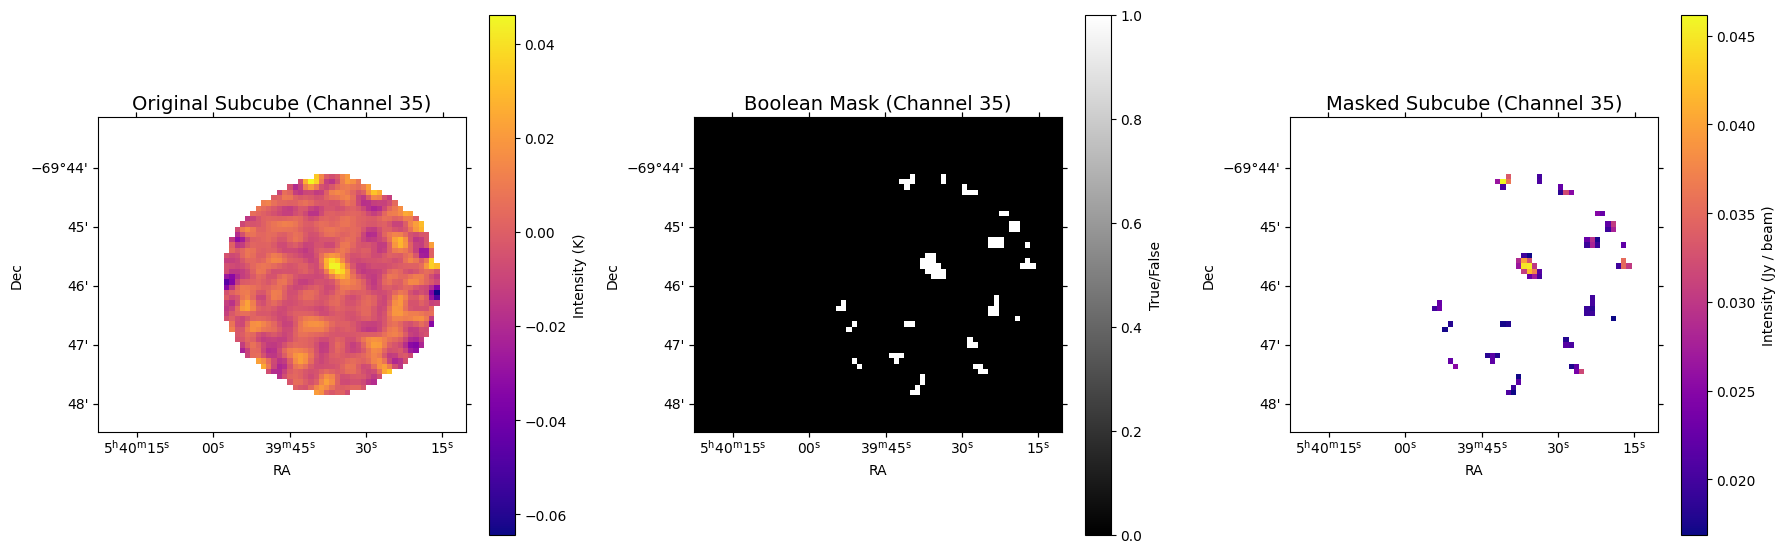

In [50]:
# ----------------- Visualizar la máscara y el efecto del enmascaramiento -----------------
# Plot para el Cubo 2 (ALMA)
# Seleccionamos un canal para la visualización
channel_index = subcube2.shape[0] // 2 # Usar el canal del medio como ejemplo
fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': subcube1.wcs.celestial})

# Trazar el subcubo original
im0 = axes[0].imshow(subcube2[channel_index].value, origin='lower', cmap='plasma')
axes[0].set_title(f"Original Subcube (Channel {channel_index})", fontsize=14)
cbar0 = plt.colorbar(im0, ax=axes[0])
cbar0.set_label(f'Intensity ({subcube1.unit})')

# Trazar la máscara booleana para ese canal
im1 = axes[1].imshow(boolean_mask2[channel_index], origin='lower', cmap='gray')
axes[1].set_title(f"Boolean Mask (Channel {channel_index})", fontsize=14)
cbar1 = plt.colorbar(im1, ax=axes[1])
cbar1.set_label('True/False')

# Trazar el subcubo enmascarado
# Asegúrate de que los valores nulos (donde la máscara es False) se muestren correctamente
masked_data = subcube_data2[channel_index] * boolean_mask2[channel_index]
masked_data[~boolean_mask2[channel_index]] = np.nan
im2 = axes[2].imshow(masked_data, origin='lower', cmap='plasma')
axes[2].set_title(f"Masked Subcube (Channel {channel_index})", fontsize=14)
cbar2 = plt.colorbar(im2, ax=axes[2])
cbar2.set_label(f'Intensity ({subcube2.unit})')

for ax in axes:
    ax.set_xlabel('RA')
    ax.set_ylabel('Dec')

plt.tight_layout()
plt.show()

-------------------------------

## Obtain the momento

In [66]:
# Calculate the zero moment
moment0_subcube1_masking = masked_subcube1.moment(order=0)
moment0_subcube2_masking = masked_subcube2.moment(order=0)

In [67]:
# Calculate the first moment
moment1_subcube1_masking = masked_subcube1.moment(order=1)
moment1_subcube2_masking = masked_subcube2.moment(order=1)

C:\Users\macka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\spectral_cube\_moments.py:182: RuntimeWarning: invalid value encountered in divide
  return (np.nansum(data * pix_cen, axis=axis) /
C:\Users\macka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\spectral_cube\_moments.py:182: RuntimeWarning: invalid value encountered in divide
  return (np.nansum(data * pix_cen, axis=axis) /


aplicar raiz al momento 2, o aplicar line_FWHM()

In [68]:
#moment2_subcube1 = masked_subcube1.moment(order=2)
#moment2_subcube2 = masked_subcube2.moment(order=2)

linewidth_subcube1_masking = masked_subcube1.linewidth_sigma()
linewidth_subcube2_masking = masked_subcube2.linewidth_sigma()

## Vizualization of moments

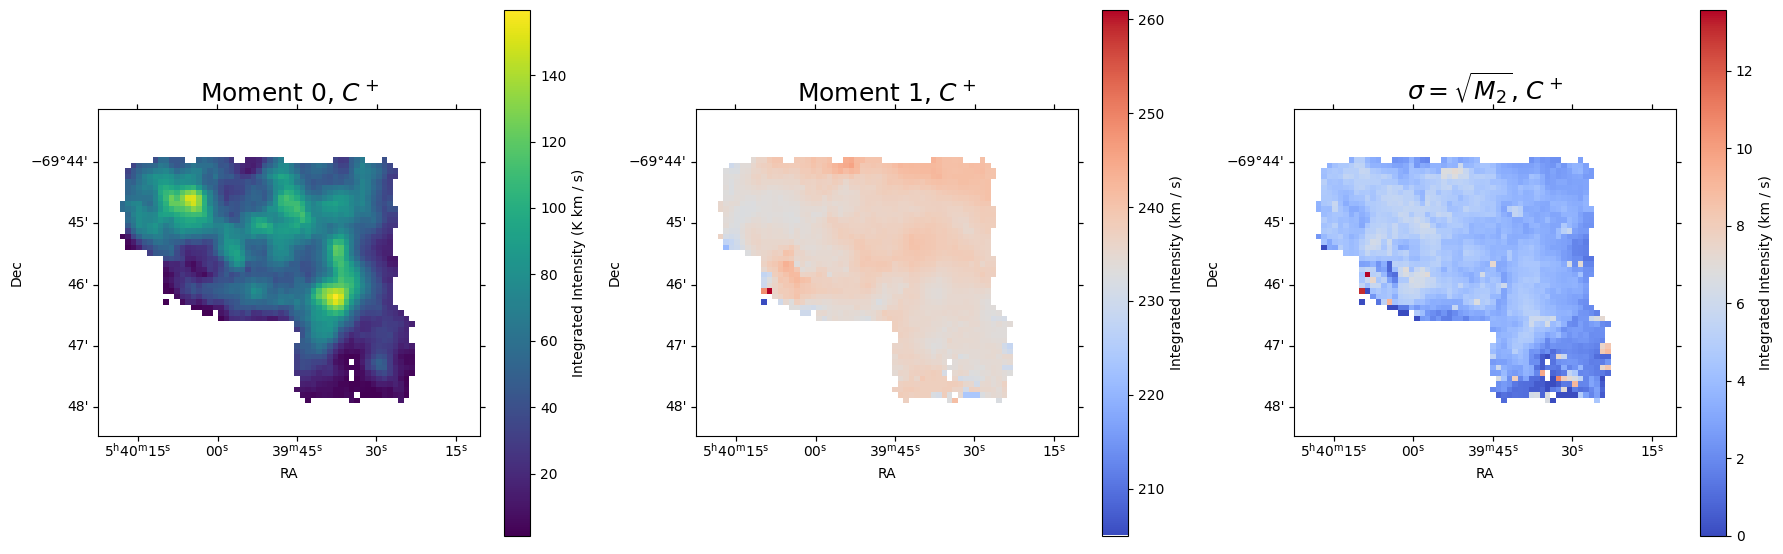

In [38]:

fig = plt.figure(figsize=(18, 6))

# Moment 0
ax0 = fig.add_subplot(1, 3, 1, projection=moment0_subcube1_masking.wcs)
im0 = ax0.imshow(moment0_subcube1_masking.value, origin='lower', cmap='viridis')
ax0.set_title(r"Moment 0, $C^+$", fontsize=18)
cbar0 = plt.colorbar(im0, ax=ax0)
cbar0.set_label(f'Integrated Intensity ({moment0_subcube1_masking.unit})')
ax0.set_xlabel('RA')
ax0.set_ylabel('Dec')

# Moment 1
ax1 = fig.add_subplot(1, 3, 2, projection=moment1_subcube1_masking.wcs)
im1 = ax1.imshow(moment1_subcube1_masking.value, origin='lower', cmap='coolwarm')
ax1.set_title(r"Moment 1, $C^+$", fontsize=18)
cbar1 = plt.colorbar(im1, ax=ax1)
cbar1.set_label(f'Integrated Intensity ({moment1_subcube1_masking.unit})')
ax1.set_xlabel('RA')
ax1.set_ylabel('Dec')

# Moment 2
ax2 = fig.add_subplot(1, 3, 3, projection=linewidth_subcube1_masking.wcs)
im2 = ax2.imshow(linewidth_subcube1_masking.value, origin='lower', cmap='coolwarm')
ax2.set_title(r'$\sigma = \sqrt{M_2}$, $C^+$', fontsize=18)
cbar2 = plt.colorbar(im2, ax=ax2)
cbar2.set_label(f'Integrated Intensity ({linewidth_subcube1_masking.unit})')
ax2.set_xlabel('RA')
ax2.set_ylabel('Dec')

plt.tight_layout()
plt.show()


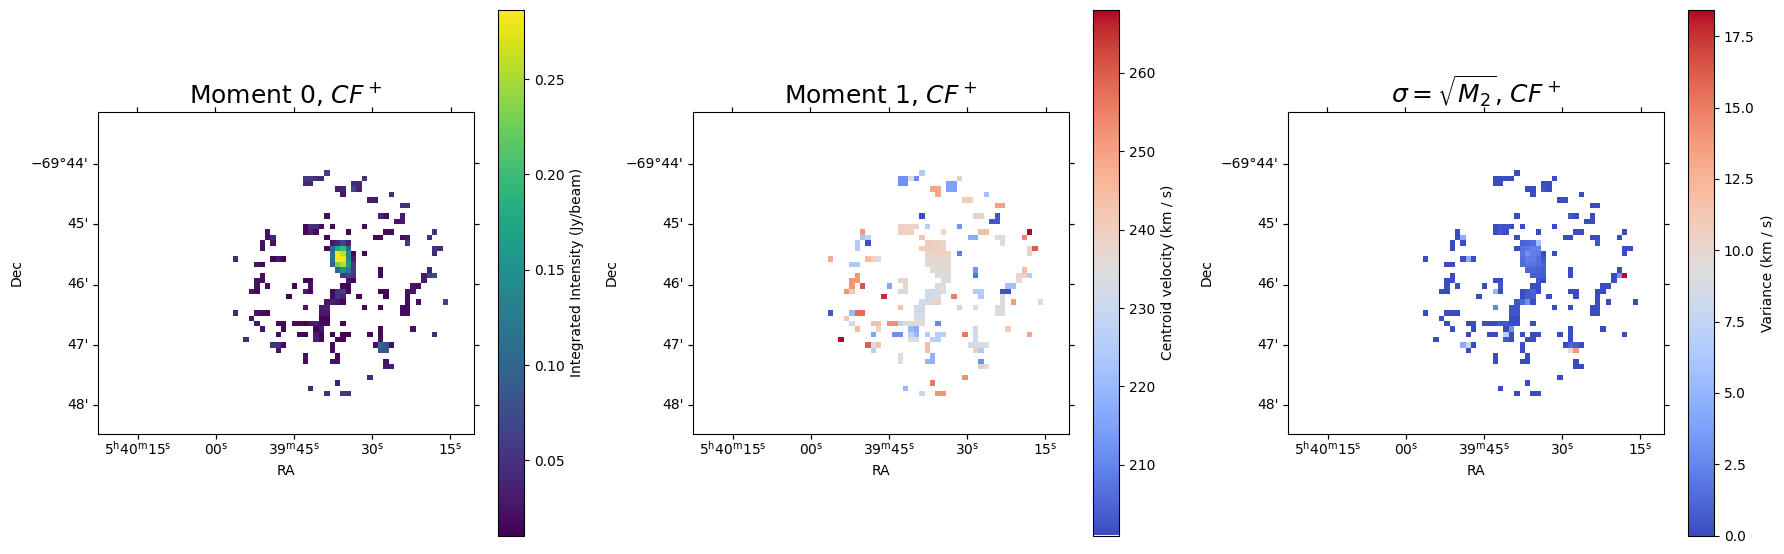

In [69]:

fig = plt.figure(figsize=(18, 6))

# Moment 0
ax0 = fig.add_subplot(1, 3, 1, projection=moment0_subcube2_masking.wcs)
im0 = ax0.imshow(moment0_subcube2_masking.value, origin='lower', cmap='viridis')
ax0.set_title(r"Moment 0, $CF^+$", fontsize=18)
cbar0 = plt.colorbar(im0, ax=ax0)
cbar0.set_label(f'Integrated Intensity (Jy/beam)')
ax0.set_xlabel('RA')
ax0.set_ylabel('Dec')

# Moment 1
ax1 = fig.add_subplot(1, 3, 2, projection=moment1_subcube2_masking.wcs)
im1 = ax1.imshow(moment1_subcube2_masking.value, origin='lower', cmap='coolwarm')
ax1.set_title(r"Moment 1, $CF^+$", fontsize=18)
cbar1 = plt.colorbar(im1, ax=ax1)
cbar1.set_label(f'Centroid velocity ({moment1_subcube2_masking.unit})')
ax1.set_xlabel('RA')
ax1.set_ylabel('Dec')

# Moment 2
ax2 = fig.add_subplot(1, 3, 3, projection=linewidth_subcube2_masking.wcs)
im2 = ax2.imshow(linewidth_subcube2_masking.value, origin='lower', cmap='coolwarm')
ax2.set_title(r'$\sigma = \sqrt{M_2}$, $CF^+$', fontsize=18)
cbar2 = plt.colorbar(im2, ax=ax2)
cbar2.set_label(f'Variance ({linewidth_subcube2_masking.unit})')
ax2.set_xlabel('RA')
ax2.set_ylabel('Dec')

plt.tight_layout()
plt.show()

In [70]:
# Convert celestial coordinates to pixel coordinates for the region of interest
center_x_pix, center_y_pix = skycoord_to_pixel(coord, wcs2, origin=0)

# Convert the width and height from arcsec to pixels
pixel_scale_x = abs(wcs2.pixel_scale_matrix[0, 0] * u.deg).to(u.arcsec)
pixel_scale_y = abs(wcs2.pixel_scale_matrix[1, 1] * u.deg).to(u.arcsec)
width_pix = width.to(u.arcsec).value / pixel_scale_x.value
height_pix = height.to(u.arcsec).value / pixel_scale_y.value

# Calculate the pixel limits for the zoom
xmin_pix = center_x_pix - width_pix / 2
xmax_pix = center_x_pix + width_pix / 2
ymin_pix = center_y_pix - height_pix / 2
ymax_pix = center_y_pix + height_pix / 2

C:\Users\macka\AppData\Local\Temp\ipykernel_30200\2406012449.py:35: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


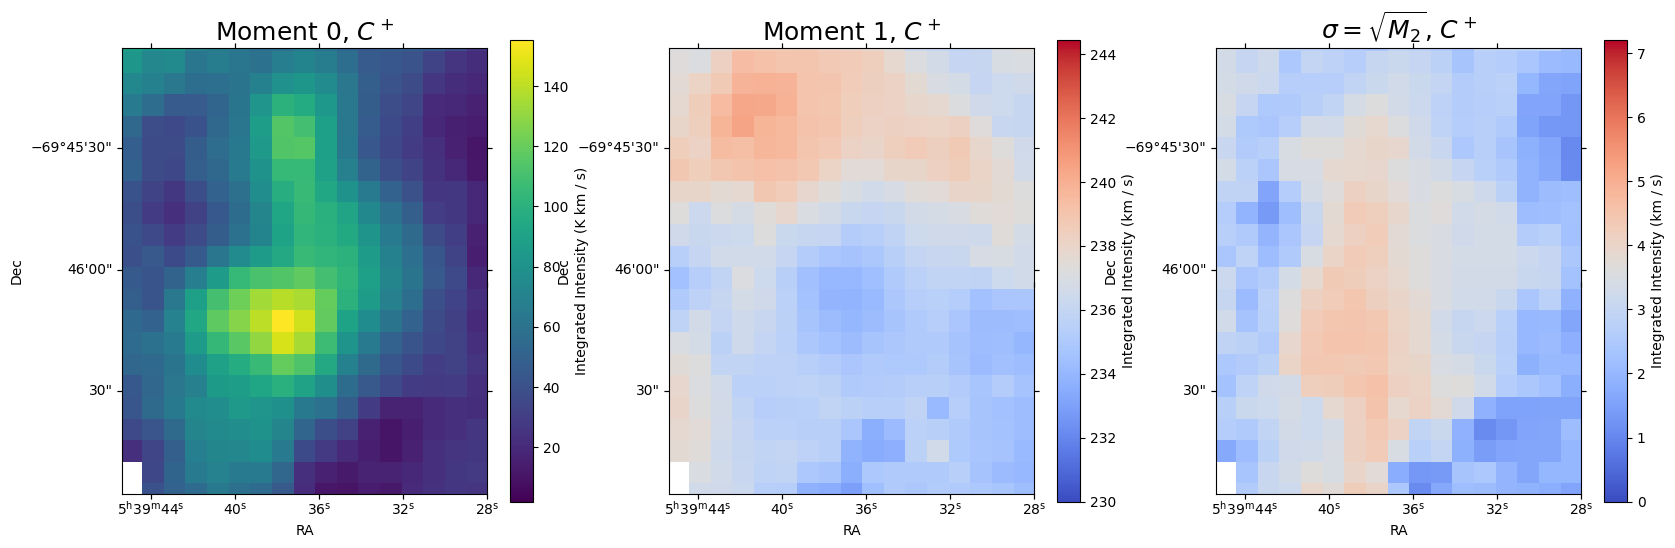

In [15]:

fig = plt.figure(figsize=(20, 6))

# Moment 0
ax0 = fig.add_subplot(1, 3, 1, projection=moment0_subcube1_masking.wcs)
im0 = ax0.imshow(moment0_subcube1_masking.value, origin='lower', cmap='viridis')
ax0.set_title(r"Moment 0, $C^+$", fontsize=18)
cbar0 = plt.colorbar(im0, ax=ax0)
cbar0.set_label(f'Integrated Intensity ({moment0_subcube1_masking.unit})')
ax0.set_xlabel('RA')
ax0.set_ylabel('Dec')

# Moment 1
ax1 = fig.add_subplot(1, 3, 2, projection=moment1_subcube1_masking.wcs)
im1 = ax1.imshow(moment1_subcube1_masking.value, origin='lower', cmap='coolwarm')
ax1.set_title(r"Moment 1, $C^+$", fontsize=18)
cbar1 = plt.colorbar(im1, ax=ax1)
cbar1.set_label(f'Integrated Intensity ({moment1_subcube1_masking.unit})')
ax1.set_xlabel('RA')
ax1.set_ylabel('Dec')

# Moment 2
ax2 = fig.add_subplot(1, 3, 3, projection=linewidth_subcube1_masking.wcs)
im2 = ax2.imshow(linewidth_subcube1_masking.value, origin='lower', cmap='coolwarm')
ax2.set_title(r'$\sigma = \sqrt{M_2}$, $C^+$', fontsize=18)
cbar2 = plt.colorbar(im2, ax=ax2)
cbar2.set_label(f'Integrated Intensity ({linewidth_subcube1_masking.unit})')
ax2.set_xlabel('RA')
ax2.set_ylabel('Dec')

for ax in (ax0, ax1, ax2):
    ax.set_xlim(xmin_pix, xmax_pix)
    ax.set_ylim(ymin_pix, ymax_pix)


plt.tight_layout()
plt.show()


C:\Users\macka\AppData\Local\Temp\ipykernel_30200\4065561930.py:35: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


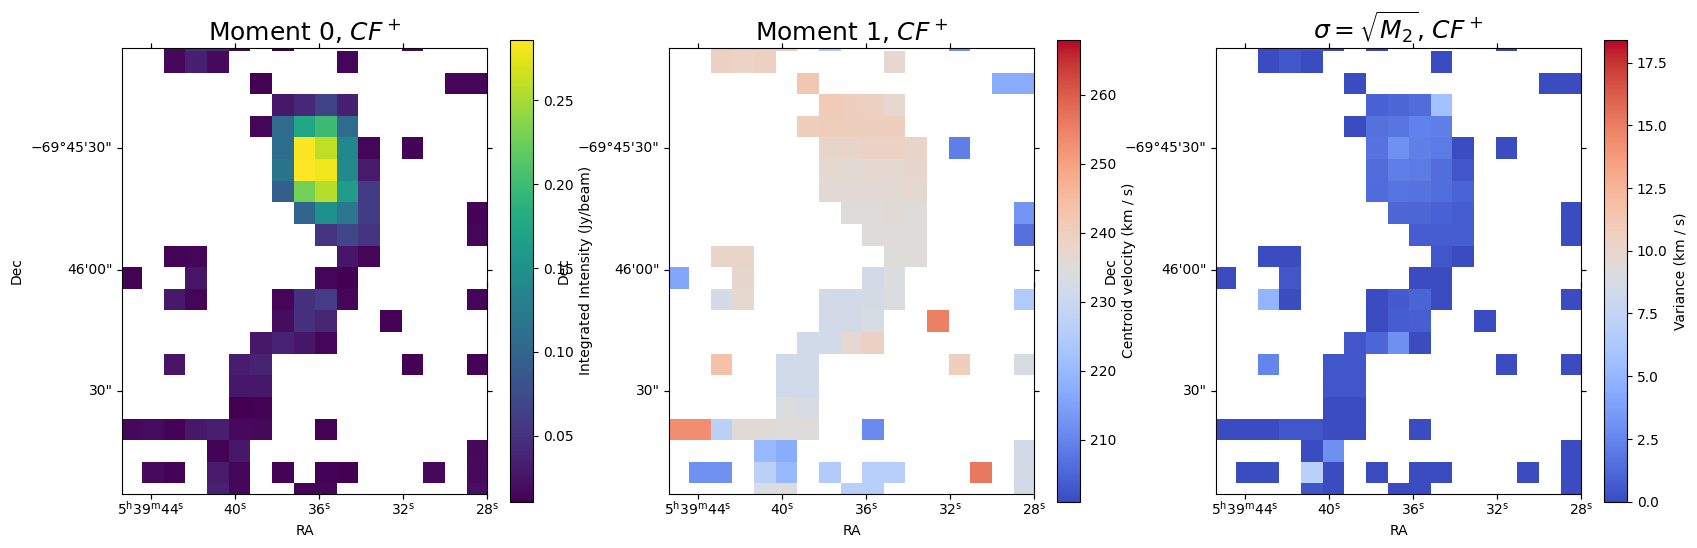

In [71]:

fig = plt.figure(figsize=(20, 6))

# Moment 0
ax0 = fig.add_subplot(1, 3, 1, projection=moment0_subcube2_masking.wcs)
im0 = ax0.imshow(moment0_subcube2_masking.value, origin='lower', cmap='viridis')
ax0.set_title(r"Moment 0, $CF^+$", fontsize=18)
cbar0 = plt.colorbar(im0, ax=ax0)
cbar0.set_label(f'Integrated Intensity (Jy/beam)')
ax0.set_xlabel('RA')
ax0.set_ylabel('Dec')

# Moment 1
ax1 = fig.add_subplot(1, 3, 2, projection=moment1_subcube2_masking.wcs)
im1 = ax1.imshow(moment1_subcube2_masking.value, origin='lower', cmap='coolwarm')
ax1.set_title(r"Moment 1, $CF^+$", fontsize=18)
cbar1 = plt.colorbar(im1, ax=ax1)
cbar1.set_label(f'Centroid velocity ({moment1_subcube2_masking.unit})')
ax1.set_xlabel('RA')
ax1.set_ylabel('Dec')

# Moment 2
ax2 = fig.add_subplot(1, 3, 3, projection=linewidth_subcube2_masking.wcs)
im2 = ax2.imshow(linewidth_subcube2_masking.value, origin='lower', cmap='coolwarm')
ax2.set_title(r'$\sigma = \sqrt{M_2}$, $CF^+$', fontsize=18)
cbar2 = plt.colorbar(im2, ax=ax2)
cbar2.set_label(f'Variance ({linewidth_subcube2_masking.unit})')
ax2.set_xlabel('RA')
ax2.set_ylabel('Dec')

for ax in (ax0, ax1, ax2):
    ax.set_xlim(xmin_pix, xmax_pix)
    ax.set_ylim(ymin_pix, ymax_pix)


plt.tight_layout()
plt.show()

Generate the moment, without intensities masking

In [18]:
# Calculate the zero moment 
moment0_subcube1 = subcube1.moment(order=0)
moment0_subcube2 = subcube2.moment(order=0)

#### Saving the Integrated Maps

In [19]:
print(repr(moment0_subcube2_masking.header))

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2                                                  
NAXIS1  =                   70                                                  
NAXIS2  =                   60                                                  
BMAJ    = 0.004444444444444444                                                  
BMIN    = 0.004444444444444444                                                  
BPA     =                  0.0                                                  
BTYPE   = 'Intensity'                                                           
OBJECT  = 'N159-13CII'                                                          
BUNIT   = 'K km s-1'           / Brightness unit in Jy/beam                     
ALTRVAL =   5.990705566226E+05 /Alternate frequency reference value             
ALTRPIX =   1.000000000000E+

#### ----------------------------- Saving the moments -------------------------------

In [20]:
print('Guardando los mapas de momento en archivos FITS...')
# Cubo 1 (YOKO)
moment0_subcube1_masking.write(output_file1, overwrite=True)
moment1_subcube1_masking.write(output_file1_m1, overwrite=True)
linewidth_subcube1_masking.write(output_file1_linewidth, overwrite=True)


# Cubo 2 (GARCIA)
moment0_subcube2_masking.write(output_file2, overwrite=True)
moment1_subcube2_masking.write(output_file2_m1, overwrite=True)
linewidth_subcube2_masking.write(output_file2_linewidth, overwrite=True)
print('Archivos FITS guardados exitosamente.')

Guardando los mapas de momento en archivos FITS...
Archivos FITS guardados exitosamente.


---------------------------------------------------

#### ------------------------ Generate plot with the masking and select the number of channels to colaps --------------------------

In [25]:
def calculate_moment(cube, data_rms, vel_min, vel_max, nchan, order, output_file):
    # Cortar cubo en velocidad
    subcube = cube.with_spectral_unit(u.km/u.s)
    subcube = subcube.spectral_slab(vel_min, vel_max)
    
    # Número total de canales del subcubo
    n_total_channels = subcube.shape[0]
    n_blocks = n_total_channels // nchan  # omite canales restantes
    
    # Lista para almacenar los mapas de momento
    moment_maps = []
    velocity_centers = []

    # Loop por bloques de canales
    for i in range(n_blocks):
        start = i * nchan
        end = start + nchan
        block = subcube[start:end, :, :]
        
        # ----------------- Aplicar la máscara de 3-sigma al bloque -----------------
        # Creamos la máscara de 3-sigma para el bloque actual
        block_data = block.hdu.data
        # Hacemos el broadcast de los datos de RMS para que coincida con la forma del bloque
        threshold_3d = np.broadcast_to(data_rms.value, block_data.shape)
        # Creamos la máscara booleana comparando los arrays de numpy
        boolean_mask = block_data > (3 * threshold_3d)
        # Aplicamos la máscara al bloque
        masked_block = block.with_mask(boolean_mask)

        # Calcular el mapa de momento a partir del bloque enmascarado
        moment_map = masked_block.moment(order=order)
        moment_maps.append(moment_map.data)  # Guardar solo los datos (array numpy)
        
        # Calcular el valor promedio de velocidad para el bloque
        vel_start = subcube.spectral_axis[start].value
        vel_end = subcube.spectral_axis[end-1].value if end <= n_total_channels else subcube.spectral_axis[-1].value
        vel_center = (vel_start + vel_end) / 2.0
        velocity_centers.append(vel_center)
    
    # Convertir la lista de mapas de momento en un cubo 3D
    moment_cube_data = np.stack(moment_maps, axis=0)  # Apila los mapas en el eje 0
    
    # Copiar el encabezado del cubo original
    header = copy.deepcopy(cube.header)
    
    # Modificar el encabezado para reflejar el nuevo cubo
    header['NAXIS'] = 3  # Cubo 3D
    header['NAXIS3'] = n_blocks  # Número de bloques (mapas de momento)
    header['CTYPE3'] = 'VELO-LSR'  # Eje espectral (velocidad)
    header['CUNIT3'] = 'km s-1'  # Unidad de velocidad
    header['CRVAL3'] = velocity_centers[0]  # Valor de referencia (velocidad del primer bloque)
    header['CDELT3'] = nchan  # Incremento de velocidad
    header['CRPIX3'] = 1  # Píxel de referencia
    header['BUNIT'] = f'{cube.header.get("BUNIT", "")} km s^-1' if order == 0 else cube.header.get('BUNIT', '')  # Ajustar unidad para momento 0
    
    # Mantener claves espectrales relevantes
    if 'SPECSYS' in cube.header:
        header['SPECSYS'] = cube.header['SPECSYS']  # Sistema de referencia espectral
    if 'RESTFRQ' in cube.header:
        header['RESTFRQ'] = cube.header['RESTFRQ']  # Frecuencia de reposo (si aplica)
    
    # Agregar comentario sobre los rangos de velocidad
    for i, vel in enumerate(velocity_centers, 1):
        header[f'V_CENTER{i}'] = f'{vel:.2f} km/s'
    
    # Crear el objeto HDU con los datos y el encabezado
    hdu = fits.PrimaryHDU(data=moment_cube_data, header=header)
    
    # Guardar el cubo en un archivo FITS
    hdu.writeto(output_file, overwrite=True)
    
    return moment_maps, velocity_centers

In [26]:
# ----------------- Run the function for both cubes -------------------
moment_maps1, velocity_ranges1 = calculate_moment(cube1, vel_min, vel_max, nchan, order, output_file1)
moment_maps2, velocity_ranges2 = calculate_moment(cube2, vel_min, vel_max, nchan, order, output_file2)

TypeError: calculate_moment() missing 1 required positional argument: 'output_file'

#### --------------- Saving the new moment whit different nchan ---------------------------

In [ ]:
# Imprimir los rangos de velocidad para cada bloque
print(f'Moment maps for cube1 saved to {output_file1}')
for i, (vel_min, vel_max) in enumerate(velocity_ranges1, 1):
    print(f'Cube1 - Block {i}: Velocity range {vel_min:.2f} to {vel_max:.2f} km/s')

print(f'Moment maps for cube2 saved to {output_file2}')
for i, (vel_min, vel_max) in enumerate(velocity_ranges2, 1):
    print(f'Cube2 - Block {i}: Velocity range {vel_min:.2f} to {vel_max:.2f} km/s')

In [ ]:
# Verificar que los archivos FITS generados se pueden abrir con SpectralCube
try:
    test_cube1 = SpectralCube.read(output_file1)
    print(f"Successfully opened {output_file1} with SpectralCube")
    print(test_cube1.header)
except Exception as e:
    print(f"Failed to open {output_file1} with SpectralCube: {e}")

try:
    test_cube2 = SpectralCube.read(output_file2)
    print(f"Successfully opened {output_file2} with SpectralCube")
    print(test_cube2.header)
except Exception as e:
    print(f"Failed to open {output_file2} with SpectralCube: {e}")

## EXTRA


In [23]:
# https://astroquery.readthedocs.io/en/latest/splatalogue/splatalogue.html#

from astroquery.splatalogue import Splatalogue
CF_line_ids = Splatalogue.get_species_ids(species_regex='CF')

len(CF_line_ids)
CF_line_ids

{'03111 CF - Fluoromethylidyne': '287',
 '03113 CF+ v = 1 - Fluoromethyliumylidene': '962',
 '03112 CF+ v = 0 - Fluoromethyliumylidene': '115'}

In [24]:
Fluor = Splatalogue.get_species_ids(species_regex='Fluor')
Fluor

{'02104 H2F+ - Fluoronium': '1410',
 '03111 CF - Fluoromethylidyne': '287',
 '03113 CF+ v = 1 - Fluoromethyliumylidene': '962',
 '05511 C3F - Fluoropropadienylidenyl': '21245',
 '03112 CF+ v = 0 - Fluoromethyliumylidene': '115'}